## Smoke drink predictor


### REFERENCES

1. [Dataset](https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset)
2. [Github shivam6862](https://github.com/shivam6862/Smoke-Drink-Predictor/)


### About

- Sex male, female
- age round up to 5 years
- height round up to 5 cm[cm]
- weight [kg]
- sight_left eyesight(left)
- sight_right eyesight(right)
- hear_left hearing left, 1(normal), 2(abnormal
- hear_right hearing right, 1(normal), 2(abnormal)
- SBP Systolic blood pressure[mmHg]
- DBP Diastolic blood pressure[mmHg]
- BLDS BLDS or FSG(fasting blood glucose)[mg/dL]
- tot_chole total cholesterol[mg/dL]
- HDL_chole HDL cholesterol[mg/dL] HDL
- LDL_chole LDL cholesterol[mg/dL] LDL
- triglyceride triglyceride[mg/dL]
- hemoglobin hemoglobin[g/dL
- urine_protein protein in urine, 1(-), 2(+/-), 3(+1), 4(+2), 5(+3), 6(+4
- serum_creatinine serum(blood) creatinine[mg/dL]
- SGOT_AST SGOT(Glutamate-oxaloacetate transaminase) AST(Aspartate transaminase)[IU/L]
- SGOT_ALT ALT(Alanine transaminase)[IU/L]
- gamma_GTP y-glutamyl transpeptidase[IU/L] ]
- SMK_stat_type_cd Smoking state, 1(never), 2(used to smoke but quit), 3(still smoke
- DRK_YN Drinker or Not


- Often when patients are diagnosed with a respiratory problem or health condition, they are reluctant to reveal information regarding their smoking and drinking status, that is, whether they smoke or drink and if so, how frequently. There may be several reasons ranging from fear of dismissal or appearing as someone who is careless about personal health. In any case, this leads to misinformation and difficulty for medical practitioners in providing proper treatment. Therefore, there is a need for accurate knowledge of a patient’s smoking and drinking status without having to rely on the patient’s words for the same.
- It has been shown that this very information can be predicted based on several measurable body signals such as Blood Pressure, Cholesterol, Urine Proteins, and a few enzymes. Practitioners can use Machine Learning Models trained on this data available for several patients to predict the status of future patients.
- This report summarizes an attempt at the problem discussed above. Details have been provided for the smoking status only because the analysis and methodology are the same for the drinking status.


### IMPORTING PACKAGES


In [123]:
import tensorflow as tf
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### DATA OVERVIEWS


- The dataset for the project is the Smoking and Drinking Dataset with body signal and has been sourced from Kaggle. This dataset was collected from the National Health Insurance Service in Korea and all personal information and sensitive data were excluded.
- The data contains 9,91,346 rows and 24 columns.


In [124]:
current_y_is_smoking_or_drinking = 'SMK_stat_type_cd'

# uncomment the line below to use drinking as the target variable instead of smoking
# current_y_is_smoking_or_drinking = 'DRK_YN'

1. Under sampling

- It was observed that out of the 9,91,346 patients, around 6,00,0000 were non – smokers, which means that the proportion of patients who smoke or used to smoke is relatively small. To remove the oversampling, the number of non–smokers was reduced to 2,50,000 by random selection.


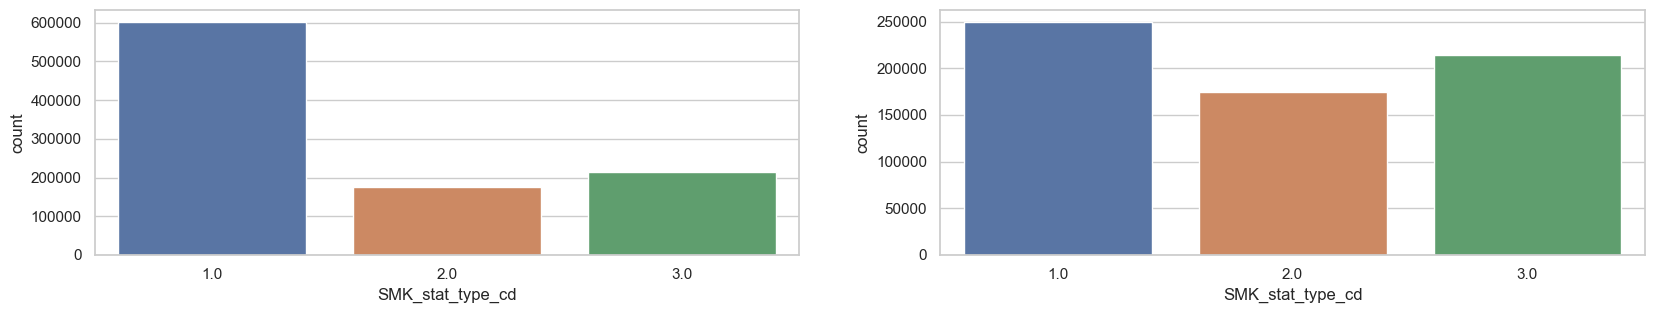

In [125]:
# Read data
data = pd.read_csv('./data/smoking_driking.csv')
# plot data
plt.subplots(1, 2, figsize=(20, 7))
plt.subplot(2, 2, 1)
sns.countplot(x=current_y_is_smoking_or_drinking, data=data,)
plt.subplot(2, 2, 2)

# Note comment out the line below to use drinking as the target variable instead of smoking
# Sample data
n = 250000
df_1 = data[data[current_y_is_smoking_or_drinking] == 1].sample(n)
df_2 = data[data[current_y_is_smoking_or_drinking] == 2]
df_3 = data[data[current_y_is_smoking_or_drinking] == 3]
data = pd.concat([df_1, df_2, df_3], axis=0).reset_index(drop=True)
# plot data
sns.countplot(x=current_y_is_smoking_or_drinking, data=data)
plt.show()

In [126]:
print('data : ', data.shape)
# Data info
data.info()

data :  (638905, 24)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638905 entries, 0 to 638904
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               638905 non-null  object 
 1   age               638905 non-null  int64  
 2   height            638905 non-null  int64  
 3   weight            638905 non-null  int64  
 4   waistline         638905 non-null  float64
 5   sight_left        638905 non-null  float64
 6   sight_right       638905 non-null  float64
 7   hear_left         638905 non-null  float64
 8   hear_right        638905 non-null  float64
 9   SBP               638905 non-null  float64
 10  DBP               638905 non-null  float64
 11  BLDS              638905 non-null  float64
 12  tot_chole         638905 non-null  float64
 13  HDL_chole         638905 non-null  float64
 14  LDL_chole         638905 non-null  float64
 15  triglyceride      638905 non-null  float64
 16 

In [127]:
# Data describe
data.describe()

age         height         weight      waistline  \
count  638905.000000  638905.000000  638905.000000  638905.000000   
mean       47.167357     164.260406      65.479617      82.459767   
std        13.790959       8.979106      12.596318      10.647031   
min        20.000000     130.000000      25.000000       8.000000   
25%        35.000000     160.000000      55.000000      76.000000   
50%        45.000000     165.000000      65.000000      82.500000   
75%        55.000000     170.000000      75.000000      89.000000   
max        85.000000     190.000000     140.000000     999.000000   

          sight_left    sight_right      hear_left     hear_right  \
count  638905.000000  638905.000000  638905.000000  638905.000000   
mean        0.997421       0.996335       1.030889       1.029579   
std         0.598939       0.605433       0.173017       0.169422   
min         0.100000       0.100000       1.000000       1.000000   
25%         0.800000       0.800000       1.000000       1.000000   
50%         1.000000       1.000000       1.000000       1.000000   
75%         1.200000       1.200000       1.000000       1.000000   
max         9.900000       9.900000       2.000000       2.000000   

                 SBP            DBP  ...      HDL_chole      LDL_chole  \
count  638905.000000  638905.000000  ...  638905.000000  638905.000000   
mean      123.135846      76.683339  ...      55.643997     112.842440   
std        14.294203       9.884589  ...      14.971168      35.590619   
min        70.000000      33.000000  ...       1.000000       1.000000   
25%       113.000000      70.000000  ...      45.000000      89.000000   
50%       122.000000      77.000000  ...      54.000000     111.000000   
75%       132.000000      82.000000  ...      64.000000     135.000000   
max       270.000000     181.000000  ...    1206.000000    2043.000000   

        triglyceride     hemoglobin  urine_protein  serum_creatinine  \
count  638905.000000  638905.000000  638905.000000     638905.000000   
mean      141.586760      14.555029       1.097716          0.892196   
std       111.440444       1.544277       0.447462          0.471406   
min         1.000000       1.000000       1.000000          0.100000   
25%        78.000000      13.500000       1.000000          0.700000   
50%       114.000000      14.700000       1.000000          0.900000   
75%       170.000000      15.700000       1.000000          1.000000   
max      6430.000000      24.200000       6.000000         98.000000   

            SGOT_AST       SGOT_ALT      gamma_GTP  SMK_stat_type_cd  
count  638905.000000  638905.000000  638905.000000     638905.000000  
mean       26.711179      27.373691      42.539176          1.943582  
std        25.246468      26.798060      56.848513          0.850287  
min         1.000000       1.000000       1.000000          1.000000  
25%        19.000000      15.000000      17.000000          1.000000  
50%        23.000000      21.000000      27.000000          2.000000  
75%        29.000000      32.000000      46.000000          3.000000  
max      9999.000000    4633.000000     999.000000          3.000000  

[8 rows x 22 columns]

In [128]:
columns = data.columns
# Data columns
columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')

In [129]:
data.describe(include=['O'])

sex  DRK_YN
count   638905  638905
unique       2       2
top       Male       Y
freq    430087  370636

In [130]:
# Missing values
columns_with_missing_values = data.columns[data.isnull().sum() > 0]
print(columns_with_missing_values)

Index([], dtype='object')


In [131]:
# Mapping sex and DRK_YN
sex_mapping = {'Male': 1, 'Female': 0}
data['sex'] = data['sex'].map(sex_mapping)

drk_mapping = {'Y': 1, 'N': 0}
data['DRK_YN'] = data['DRK_YN'].map(drk_mapping)

In [132]:
data.head()

sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0    0   45     155      55       75.0         0.8          0.7        1.0   
1    0   50     160      50       74.0         0.9          1.0        1.0   
2    1   75     160      65       86.4         0.8          1.0        1.0   
3    0   30     155      65       79.0         1.0          0.9        1.0   
4    0   80     145      50       81.0         0.3          0.3        1.0   

   hear_right    SBP  ...  LDL_chole  triglyceride  hemoglobin  urine_protein  \
0         1.0  123.0  ...      144.0         120.0        14.5            1.0   
1         1.0  109.0  ...      191.0          75.0        14.3            1.0   
2         1.0  138.0  ...       78.0          82.0        11.0            1.0   
3         1.0  112.0  ...      167.0         130.0        12.6            1.0   
4         1.0  110.0  ...       62.0         175.0        13.4            1.0   

   serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  
0               0.8      27.0      25.0       32.0               1.0       1  
1               0.7      19.0      16.0       23.0               1.0       0  
2               0.9      22.0      19.0       12.0               1.0       0  
3               0.5      23.0      27.0       22.0               1.0       0  
4               0.8      22.0      21.0       27.0               1.0       0  

[5 rows x 24 columns]

In [133]:
is_smoking = data['SMK_stat_type_cd']
print(is_smoking.head())

is_drinking = data['DRK_YN']
print(is_drinking.head())

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: SMK_stat_type_cd, dtype: float64
0    1
1    0
2    0
3    0
4    0
Name: DRK_YN, dtype: int64


### Categorical Variable Analysis


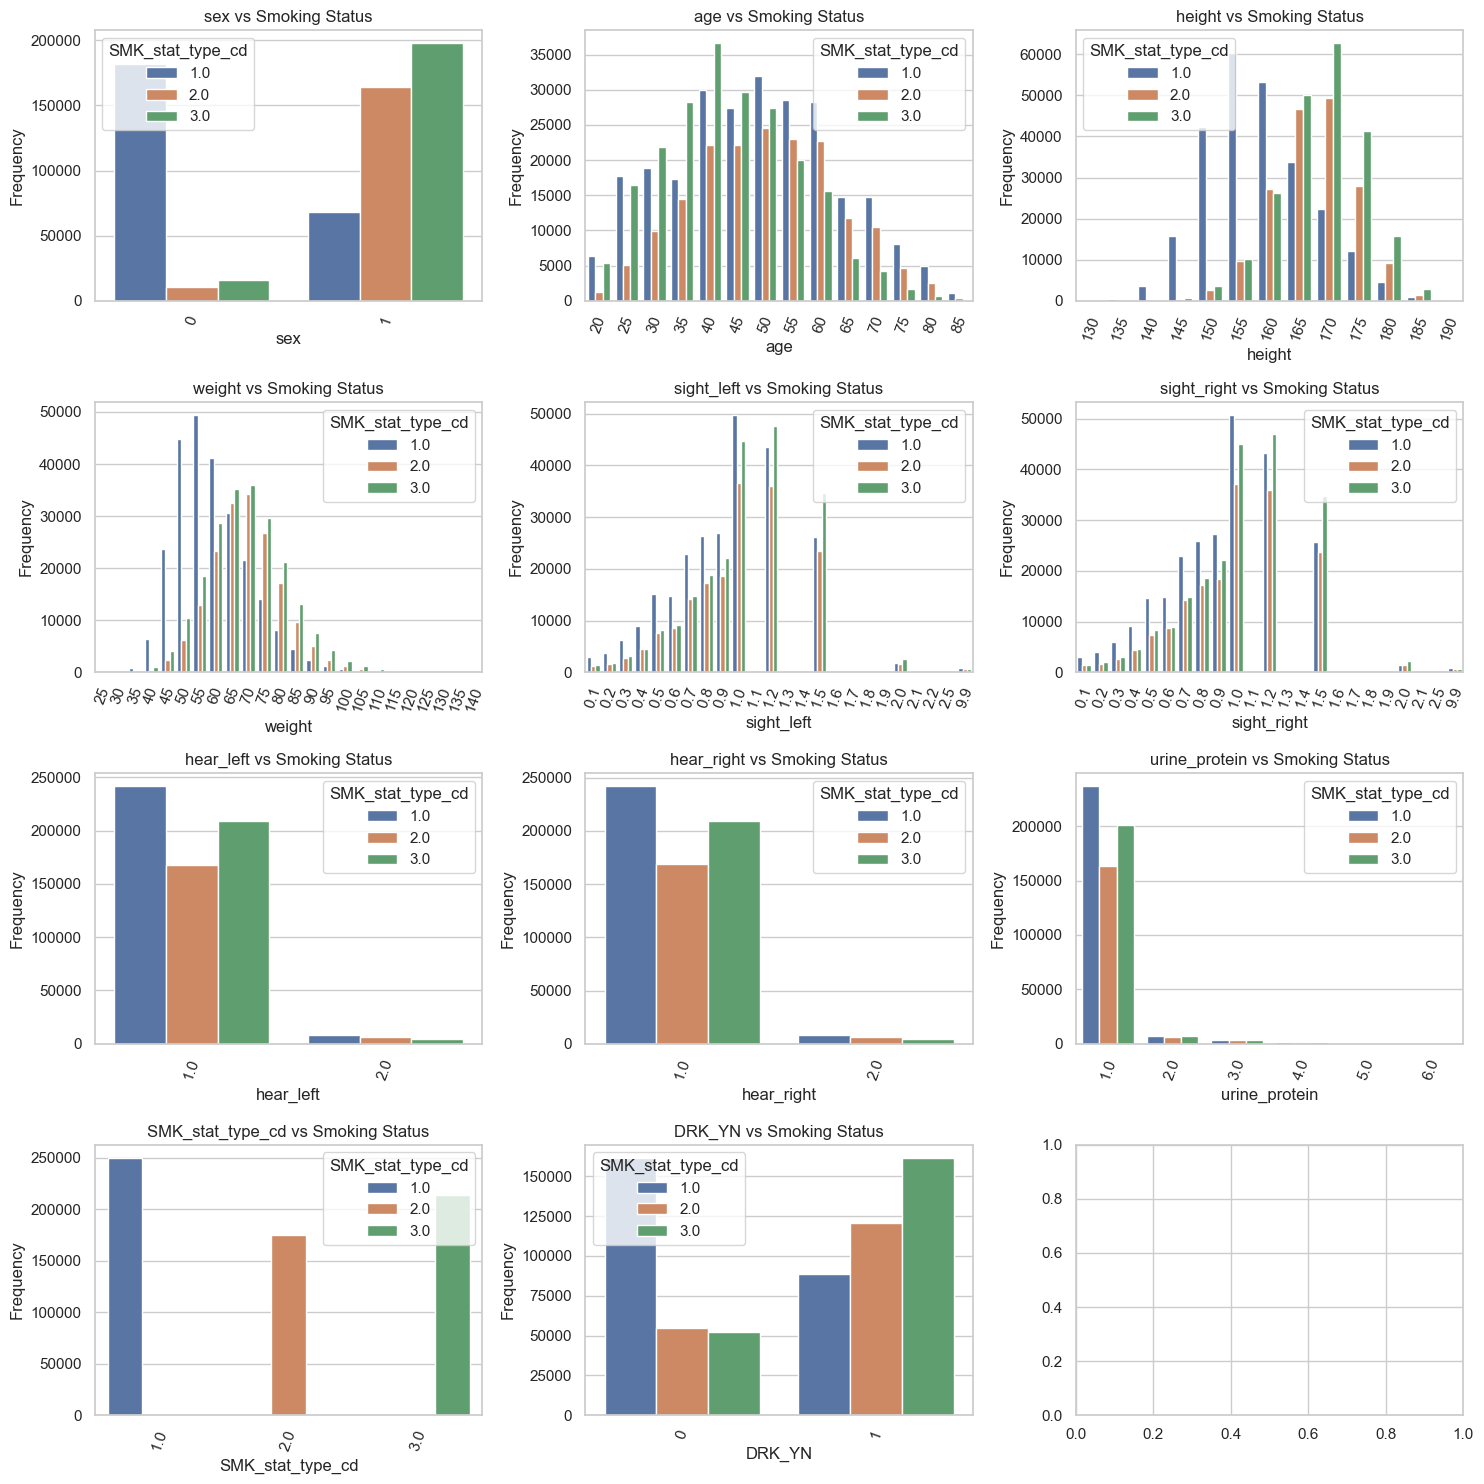

In [134]:
# Plotting
def plotting():
    # Create figure with 4x3 sub-plots.
    fig, axes = plt.subplots(4, 3, figsize=(15, 15))

    # Adjust the vertical spacing.
    for idx, column in enumerate(['sex', 'age', 'height', 'weight', 'sight_left', 'sight_right', 'hear_left', 'hear_right',
                                  "urine_protein", current_y_is_smoking_or_drinking, "DRK_YN"], start=1):
        sbp_data = data[column][0:100000]

        # Calculate the position in the 3x3 grid
        row = (idx - 1) // 4
        col = (idx - 1) % 3

        # Set the current subplot
        plt.subplot(4, 3, idx)

        # Plot the distribution of this column
        sns.countplot(x=column, data=data,
                      hue=current_y_is_smoking_or_drinking)
        plt.xlabel(f'{column}')
        plt.ylabel("Frequency")
        plt.xticks(rotation=70)
        plt.title(f'{column} vs Smoking Status')

    # Adjust layout
    plt.tight_layout()

    # Show the plots
    plt.show()


plotting()

2. Invariable Features
- Plotting values in each column as a parameter vs. the smoking status of a patient, it was observed in the case of columns urine_protein, hear_left, and hear_right that the observed values lie in the normal range for smokers and non–smokers alike. Hence, these three parameters were not taken into consideration in making predictions.


In [135]:
# Catetorical features and numerical features
categorical_features = ['sex', 'age', 'height', 'weight', 'sight_left', 'sight_right', 'hear_left', 'hear_right',
                        "urine_protein"]
numerical_features = [
    col for col in data.columns if col not in categorical_features]

### Boxplot and removing outlier


In [136]:
data.head()

sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0    0   45     155      55       75.0         0.8          0.7        1.0   
1    0   50     160      50       74.0         0.9          1.0        1.0   
2    1   75     160      65       86.4         0.8          1.0        1.0   
3    0   30     155      65       79.0         1.0          0.9        1.0   
4    0   80     145      50       81.0         0.3          0.3        1.0   

   hear_right    SBP  ...  LDL_chole  triglyceride  hemoglobin  urine_protein  \
0         1.0  123.0  ...      144.0         120.0        14.5            1.0   
1         1.0  109.0  ...      191.0          75.0        14.3            1.0   
2         1.0  138.0  ...       78.0          82.0        11.0            1.0   
3         1.0  112.0  ...      167.0         130.0        12.6            1.0   
4         1.0  110.0  ...       62.0         175.0        13.4            1.0   

   serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  
0               0.8      27.0      25.0       32.0               1.0       1  
1               0.7      19.0      16.0       23.0               1.0       0  
2               0.9      22.0      19.0       12.0               1.0       0  
3               0.5      23.0      27.0       22.0               1.0       0  
4               0.8      22.0      21.0       27.0               1.0       0  

[5 rows x 24 columns]

In [137]:
is_smoking.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: SMK_stat_type_cd, dtype: float64

In [138]:
is_drinking.head()

0    1
1    0
2    0
3    0
4    0
Name: DRK_YN, dtype: int64

In [139]:
data.shape

(638905, 24)

#### ANALYZING, 'sex', 'age', 'height', 'weight', 'sight_left', 'sight_right', 'hear_left', 'hear_right'


Plotting 1...
Plotting 2...
Plotting 3...
Plotting 4...
Plotting 5...
Plotting 6...
Plotting 7...
Plotting 8...


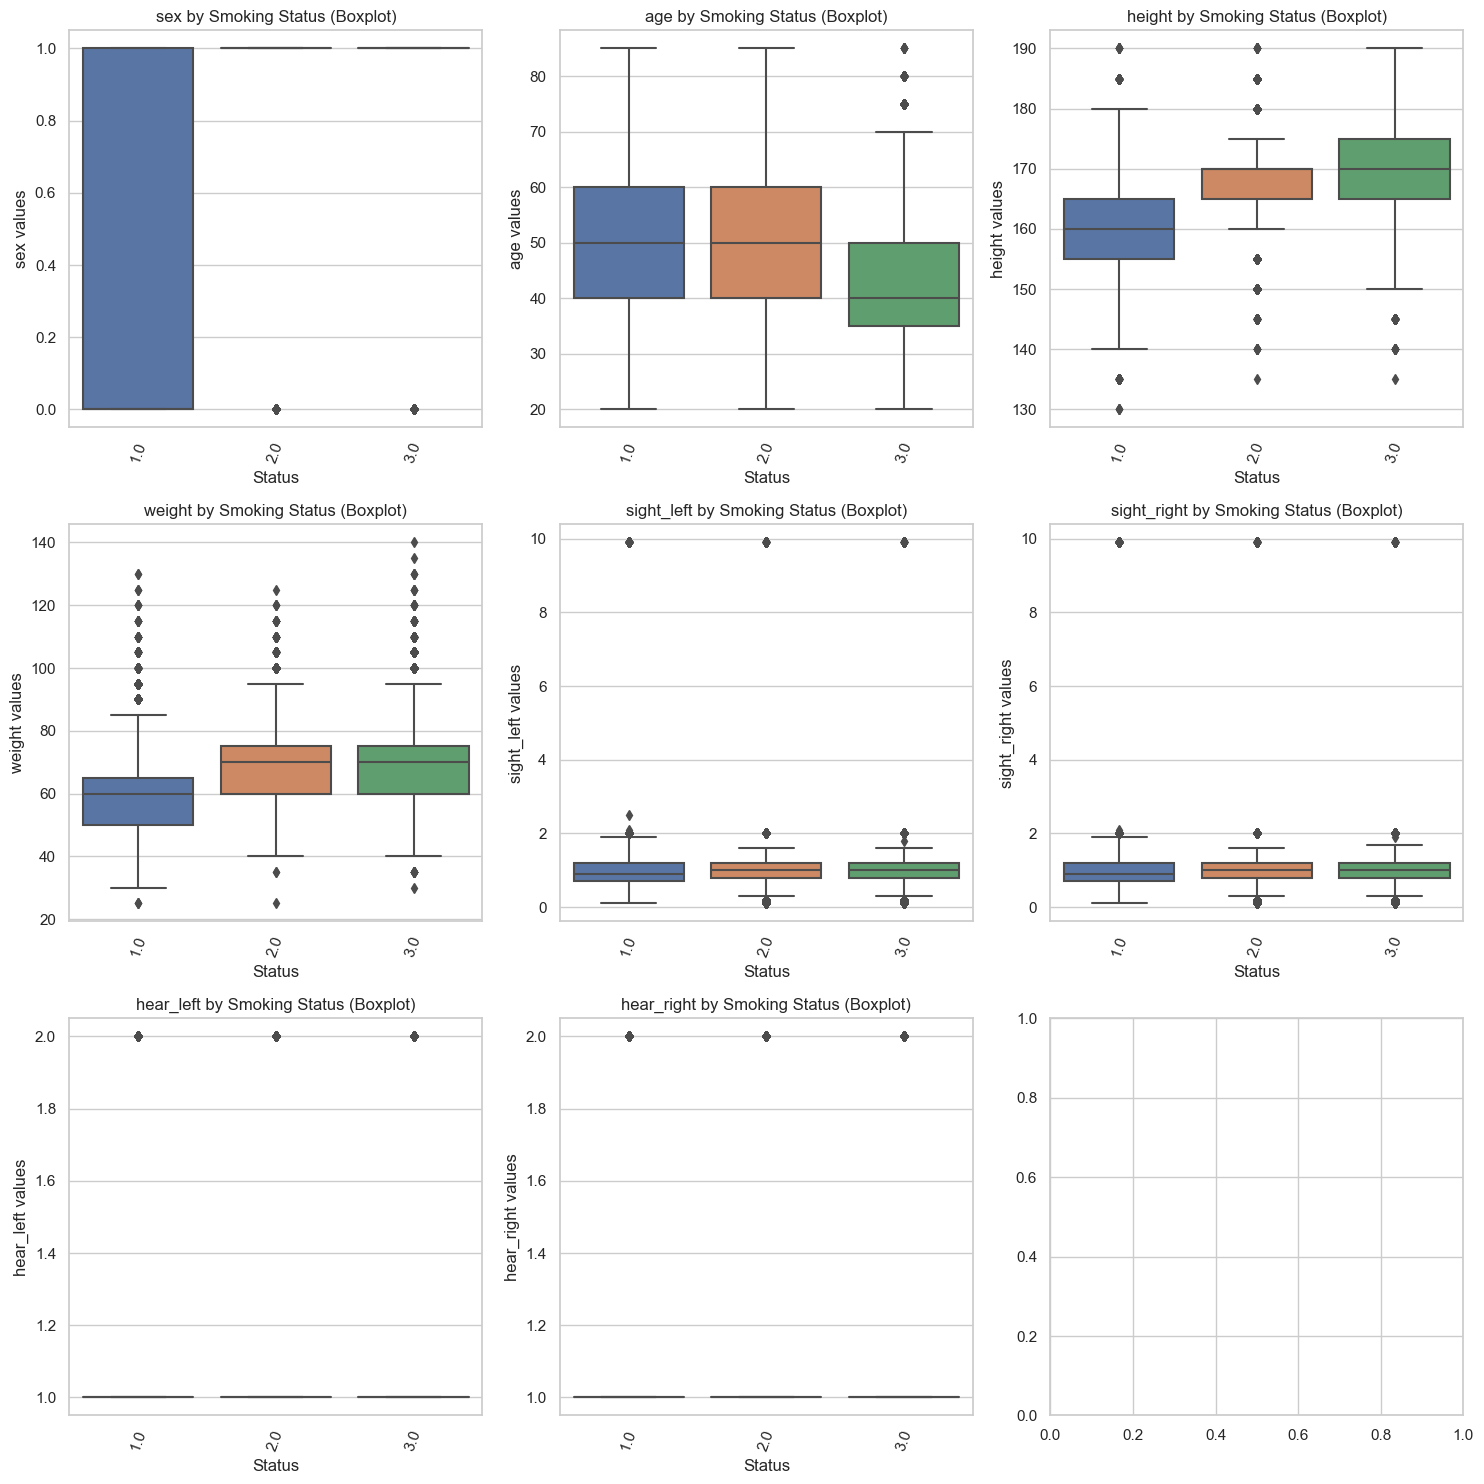

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
# Initialize the matplotlib figure
plt.subplots(3, 3, figsize=(15, 15))

random_sample_data = data.sample(n=100000, replace=True)

# All features vs Smoking Status
for idx, column in enumerate(['sex', 'age', 'height', 'weight', 'sight_left',
                              'sight_right', 'hear_left', 'hear_right'], start=1):
    print(f'Plotting {idx}...')

    plt.subplot(3, 3, idx)
    # Draw a boxplot to show distributions with respect to categories.

    sns.boxplot(x=random_sample_data[current_y_is_smoking_or_drinking],
                y=random_sample_data[column])

    plt.xlabel("Status")
    plt.xticks(rotation=70)
    plt.ylabel(f'{column} values')
    plt.title(f'{column} by Smoking Status (Boxplot)')

plt.tight_layout()
plt.show()

Some Observations from above graphs:

- (hear_left , hear_right) ---> categorical value 1 is dominated for all classes(1,2,3)
  - Hence, there is almost no variability of these features with target_class
  - So, we can drop these columns safely


In [141]:
data.drop(['hear_left', 'hear_right'], axis=1, inplace=True)

3.	Removing Outliers
- Outliers are observations that differ considerably from other observations. Such data were removed from the dataset by deleting entries whose parameters had data points lying in the top 0.1% of the complete data. 8,433 such points were found and their removal brought down the number of entries to 6,30,472.


#### ANALYZING, 'waistline' 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein', 'serum_creatinine'


Plotting 1...
Number of item greater than 0.999 percentile: 115.0
Number of values greater than 115.0 in DBP: 612
Number of rows removed: 612
Number of unique values :  621
Plotting 2...
Number of item greater than 0.999 percentile: 184.0
Number of values greater than 184.0 in DBP: 622
Number of rows removed: 622
Number of unique values :  113
Plotting 3...
Number of item greater than 0.999 percentile: 117.0
Number of values greater than 117.0 in DBP: 597
Number of rows removed: 597
Number of unique values :  81
Plotting 4...
Number of item greater than 0.999 percentile: 328.0
Number of values greater than 328.0 in DBP: 632
Number of rows removed: 632
Number of unique values :  294
Plotting 5...
Number of item greater than 0.999 percentile: 351.0
Number of values greater than 351.0 in DBP: 622
Number of rows removed: 622
Number of unique values :  295
Plotting 6...
Number of item greater than 0.999 percentile: 120.0
Number of values greater than 120.0 in DBP: 587
Number of rows removed

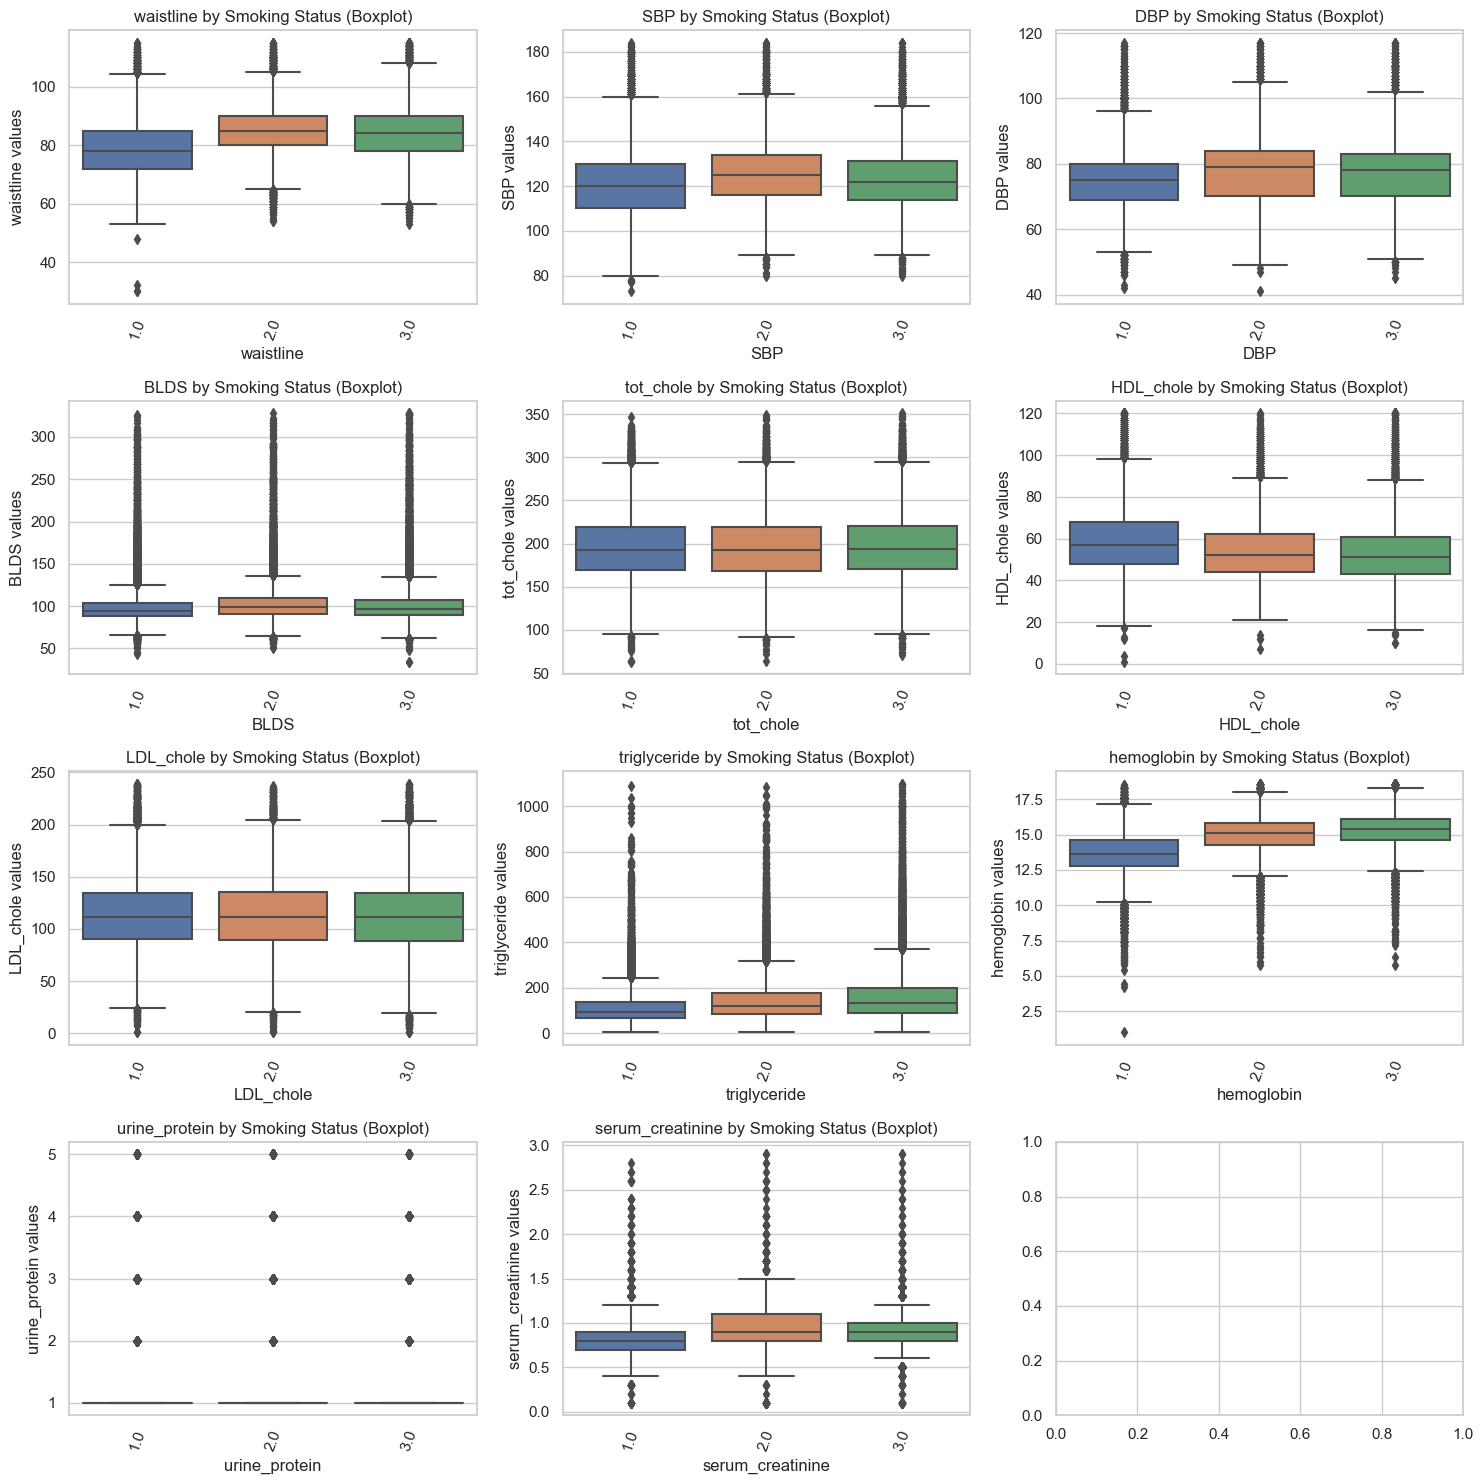

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

for idx, column in enumerate(['waistline', 'SBP', 'DBP', 'BLDS',
                              'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
                              'urine_protein', 'serum_creatinine'], start=1):
    print(f'Plotting {idx}...')

    number = 0.999
    number_of_item_greater_than_percentile = data[column].quantile(number)
    print(
        f'Number of item greater than {number} percentile: {number_of_item_greater_than_percentile}')
    count_greater_than = (
        data[column] > number_of_item_greater_than_percentile).sum()
    print(
        f'Number of values greater than {number_of_item_greater_than_percentile} in DBP: {count_greater_than}')

    mask = data[column] > number_of_item_greater_than_percentile
    data = data[~mask]
    removed_rows = mask.sum()
    print(f'Number of rows removed: {removed_rows}')

    print("Number of unique values : ", len(data[column].unique()))

sns.set(style="whitegrid")
plt.subplots(4, 3, figsize=(15, 15))

random_sample_data = data.sample(n=100000, replace=True)

for idx, column in enumerate(['waistline', 'SBP', 'DBP', 'BLDS',
                              'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
                              'urine_protein', 'serum_creatinine'], start=1):
    plt.subplot(4, 3, idx)

    sns.boxplot(x=random_sample_data[current_y_is_smoking_or_drinking],
                y=random_sample_data[column])

    plt.xlabel(column)
    plt.xticks(rotation=70)
    plt.ylabel(f'{column} values')
    plt.title(f'{column} by Smoking Status (Boxplot)')

plt.tight_layout()
plt.show()

- Feature : urine_protein is also single class dominated, no variability with target_class
- Hence, I choose to drop this column


In [143]:
data.drop(['urine_protein'], axis=1, inplace=True)

#### ANALYZING, SGOT_AST, SGOT_ALT and gamma_GTP


Plotting 1...
Number of item greater than 0.999 percentile: 212.0
Number of values greater than 212.0 in DBP: 631
Number of rows removed: 631
Number of unique values :  212
Plotting 2...
Number of item greater than 0.999 percentile: 207.0
Number of values greater than 207.0 in DBP: 624
Number of rows removed: 624
Number of unique values :  207
Plotting 3...
Number of item greater than 0.999 percentile: 676.0
Number of values greater than 676.0 in DBP: 630
Number of rows removed: 630
Number of unique values :  674
Plotting 1...
Plotting 2...
Plotting 3...


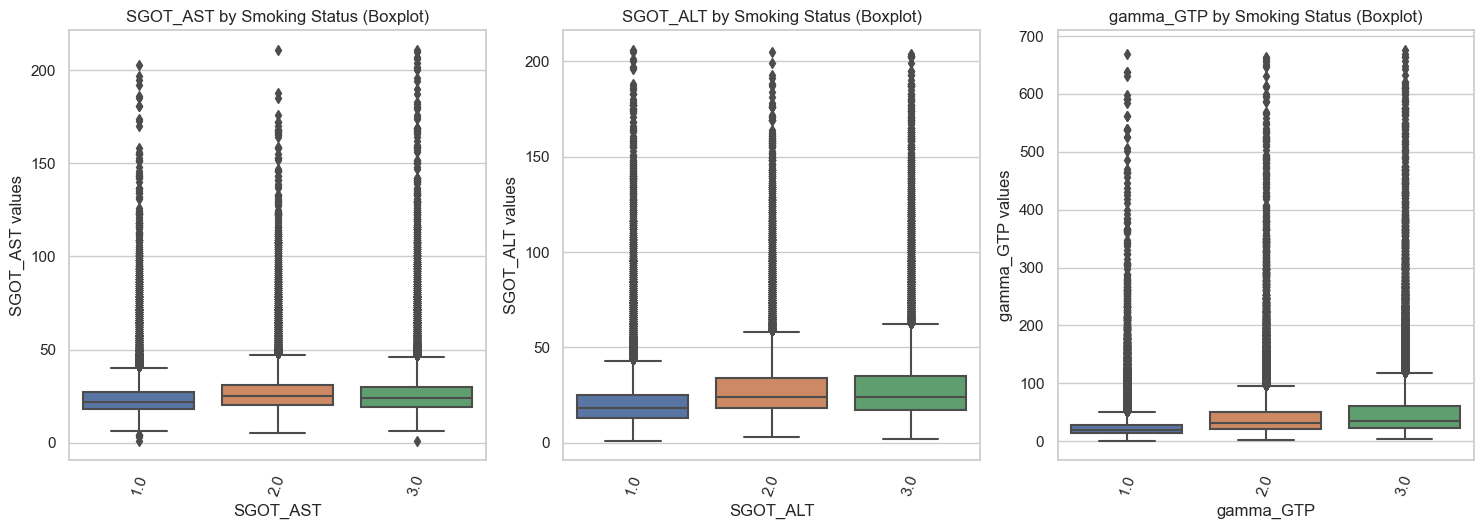

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

for idx, column in enumerate(["SGOT_AST",	"SGOT_ALT", "gamma_GTP"], start=1):
    print(f'Plotting {idx}...')

    number = 0.999
    number_of_item_greater_than_percentile = data[column].quantile(number)
    print(
        f'Number of item greater than {number} percentile: {number_of_item_greater_than_percentile}')
    count_greater_than = (
        data[column] > number_of_item_greater_than_percentile).sum()
    print(
        f'Number of values greater than {number_of_item_greater_than_percentile} in DBP: {count_greater_than}')

    mask = data[column] > number_of_item_greater_than_percentile
    data = data[~mask]
    removed_rows = mask.sum()
    print(f'Number of rows removed: {removed_rows}')

    print("Number of unique values : ", len(data[column].unique()))

sns.set(style="whitegrid")
plt.subplots(1, 3, figsize=(15, 15))

random_sample_data = data.sample(n=100000, replace=True)

for idx, column in enumerate(["SGOT_AST",	"SGOT_ALT", "gamma_GTP"], start=1):
    print(f'Plotting {idx}...')

    plt.subplot(3, 3, idx)

    sns.boxplot(x=random_sample_data[current_y_is_smoking_or_drinking],
                y=random_sample_data[column])

    plt.xlabel(column)
    plt.xticks(rotation=70)
    plt.ylabel(f'{column} values')
    plt.title(f'{column} by Smoking Status (Boxplot)')

plt.tight_layout()
plt.show()

### Mean, Std Dev and Median


In [145]:
data.shape

(630519, 21)

In [146]:
# mean, std, median
for idx, column in enumerate(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP'], start=1):
    print(idx, " : ", column, " : ", "$#" * 25)
    if current_y_is_smoking_or_drinking == 'SMK_stat_type_cd':
        for smoking_status in [1, 2, 3]:
            subset_data = data[column][is_smoking == smoking_status]
            print(f"Column: {column}, Subset {smoking_status} - Mean: {subset_data.mean():.4f}, Std Dev: {subset_data.std():.4f}, Median: {subset_data.median():.4f}")
    else:
        for drinking_status in [1, 0]:
            subset_data = data[column][is_drinking == drinking_status]
            print(f"Column: {column}, Subset {drinking_status} - Mean: {subset_data.mean():.4f}, Std Dev: {subset_data.std():.4f}, Median: {subset_data.median():.4f}")

1  :  sex  :  $#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#
Column: sex, Subset 1 - Mean: 0.2725, Std Dev: 0.4453, Median: 0.0000
Column: sex, Subset 2 - Mean: 0.9374, Std Dev: 0.2422, Median: 1.0000
Column: sex, Subset 3 - Mean: 0.9238, Std Dev: 0.2653, Median: 1.0000
2  :  age  :  $#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#
Column: age, Subset 1 - Mean: 48.4825, Std Dev: 14.8326, Median: 50.0000
Column: age, Subset 2 - Mean: 50.1040, Std Dev: 12.9971, Median: 50.0000
Column: age, Subset 3 - Mean: 43.1899, Std Dev: 12.1704, Median: 40.0000
3  :  height  :  $#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#
Column: height, Subset 1 - Mean: 158.5568, Std Dev: 8.6800, Median: 160.0000
Column: height, Subset 2 - Mean: 167.3831, Std Dev: 6.8653, Median: 170.0000
Column: height, Subset 3 - Mean: 168.3643, Std Dev: 7.1583, Median: 170.0000
4  :  weight  :  $#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#$#
Column: weight, Subset 1 - Mean: 59.2615, Std Dev: 11.2899, Median: 55.000

### Countplot by hue


- Count plots were made for all the remaining parameters for a random sample of 1,00,000 patients to understand their distribution better. The plots for all three types of smokers emerged similar for most of the parameters, but there were slight exceptions like in the case of hemoglobin.

Working with index: 1	;column name: SBP
Working with index: 2	;column name: DBP
Working with index: 3	;column name: BLDS
Working with index: 4	;column name: tot_chole
Working with index: 5	;column name: HDL_chole
Working with index: 6	;column name: LDL_chole
Working with index: 7	;column name: triglyceride
Working with index: 8	;column name: hemoglobin
Working with index: 9	;column name: serum_creatinine
Working with index: 10	;column name: SGOT_AST
Working with index: 11	;column name: SGOT_ALT
Working with index: 12	;column name: gamma_GTP


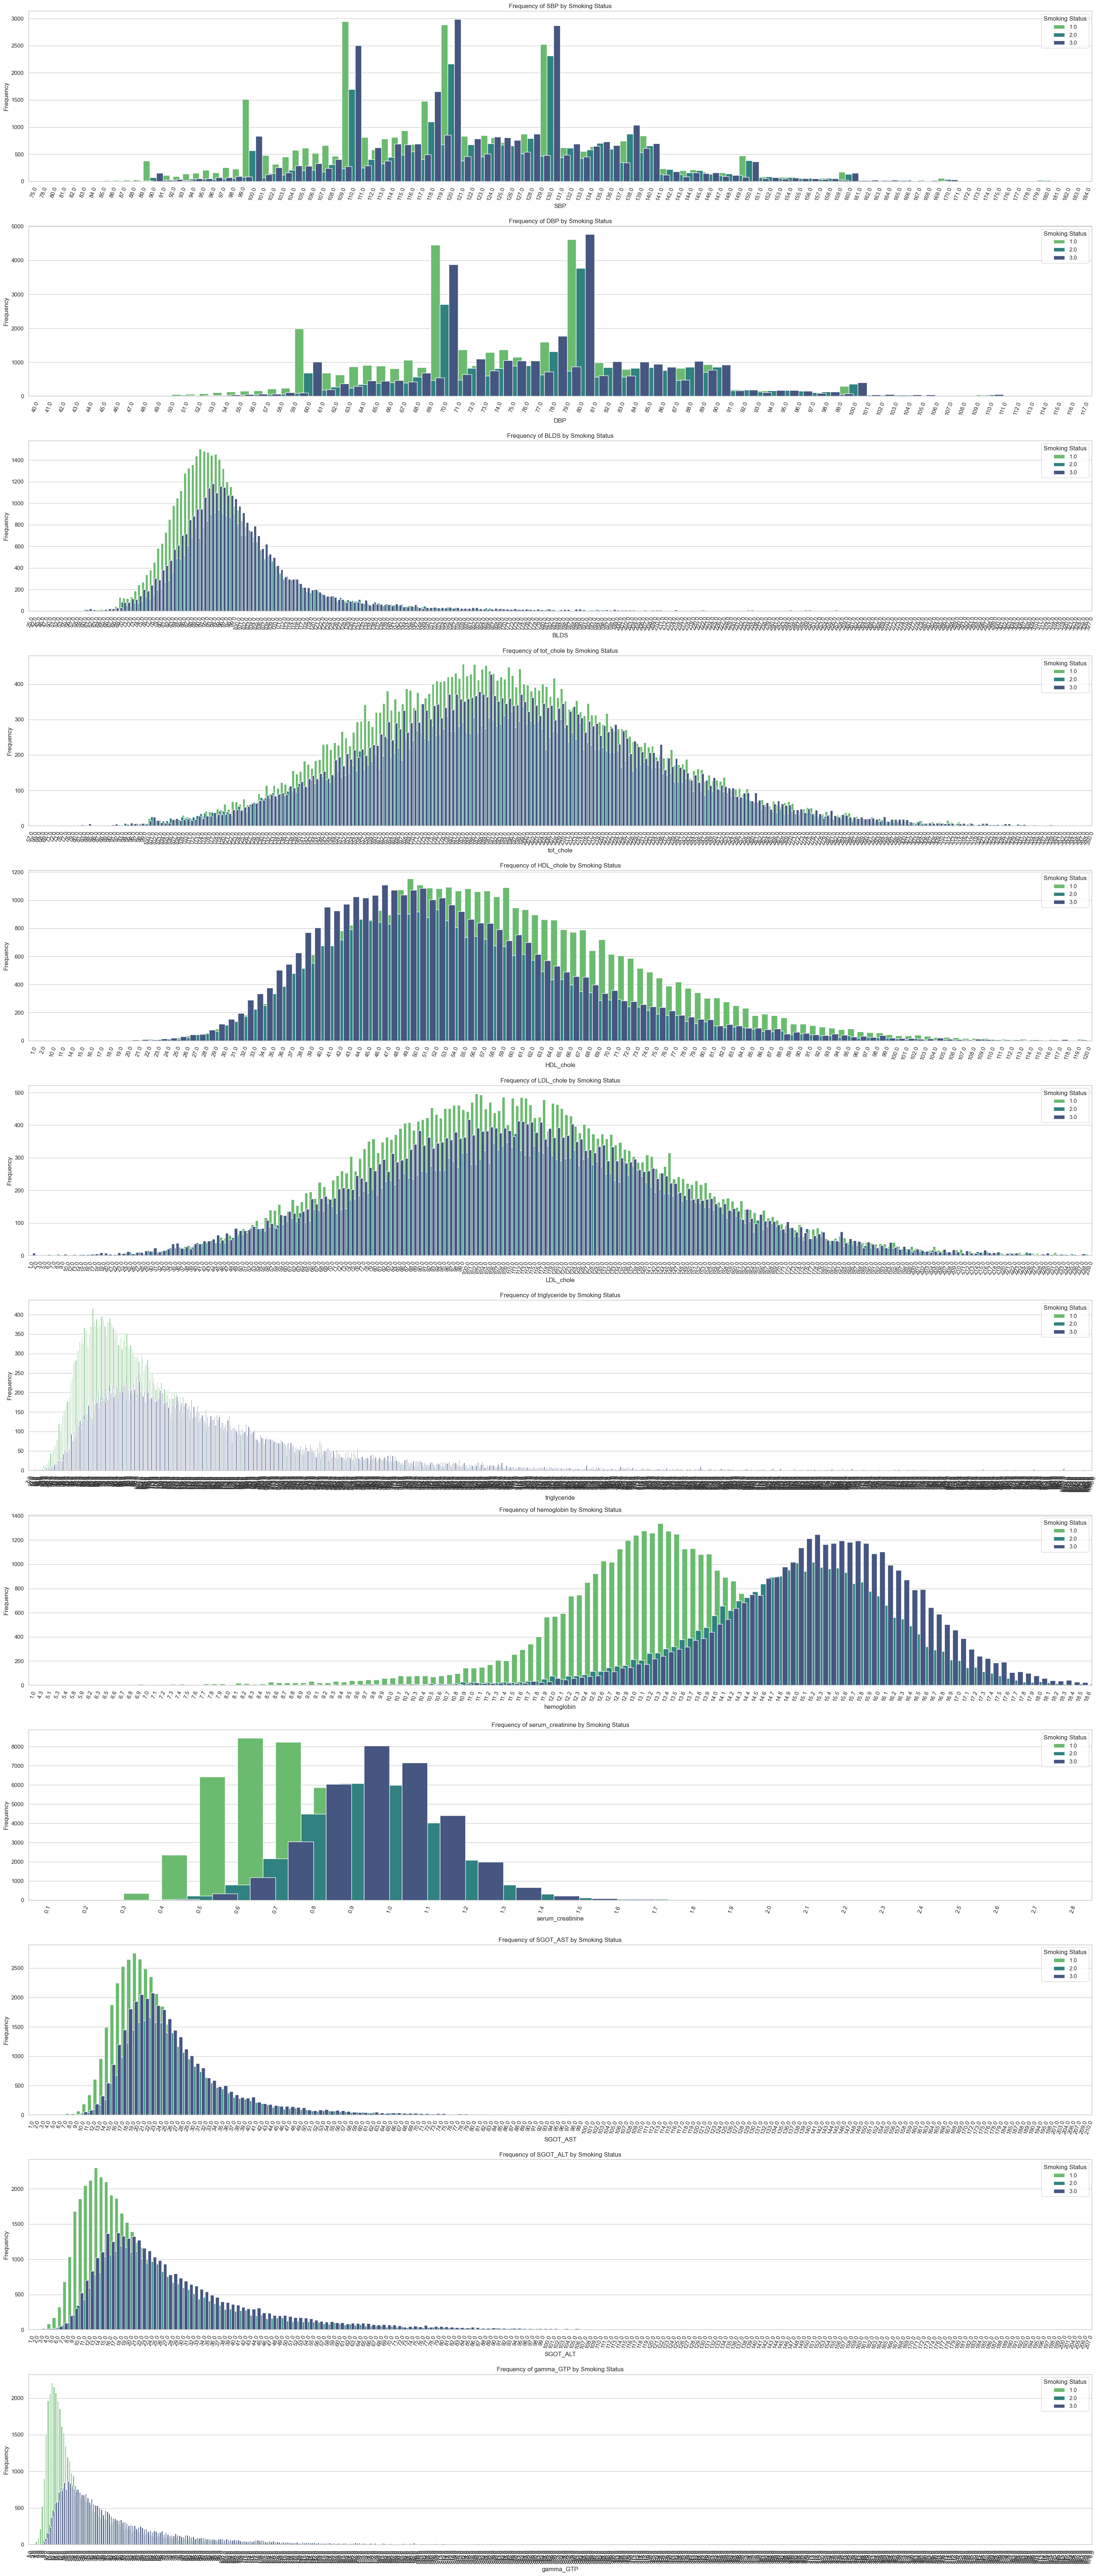

In [147]:
sns.set(style="whitegrid")
plt.subplots(12, 1, figsize=(30, 70))

random_sample_data = data.sample(n=100000, replace=True)

# All features vs Smoking Status
for idx, column in enumerate(['SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP'], start=1):
    plt.subplot(12, 1, idx)

    sns.countplot(x=column, hue=current_y_is_smoking_or_drinking, palette=f'viridis_r',
                  data=random_sample_data, width=2,)

    plt.xlabel(column)
    plt.xticks(rotation=70)
    plt.ylabel('Frequency')
    plt.title(f'Frequency of {column} by Smoking Status')
    plt.legend(title='Smoking Status', loc='upper right')

    print(f"Working with index:", end=' '), print(
        idx, end='\t'), print(";column name: ", end=""), print(column,)
plt.tight_layout()
plt.show()

### Heatmap


- Along with relations to the smoking status, relations between the parameters themselves also provide important insights. A heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors. A heatmap was made to study relations among the parameters.
- From the heatmap, we can see strong correlations between SBP – DBP, LDL_chole – tot_chole and SGOT_ALT – SGOT_AST. There was also a considerable correlation between sight_left – sight_right, which, being categorical variables (a variable that can take on only one of a small fixed list of values) were not plotted on the heatmap. So, we may consider reducing these parameters from 8 to 4 using methods such as PCA, SVD and LDA to reduce the number of dimensions.
- At the same time, we must be careful not to reduce the number of parameters too much because there already are only 22 parameters remaining to describe around 1,00,000 data – points. Keeping this in mind, parameters were reduced only in situations where one of the three methods (PCA, SVD, LDA) resulted in a data loss of less than 0.5%.

- Data loss in each case was calculated using the formula:
  ▭("data_loss = 1–explained_variance" ["0" ] )
  Finally, LDL_chole – tot_chole, SGOT_ALT – SGOT_AST and sight_left – sight_right were reduced to a single parameter each using LDA.


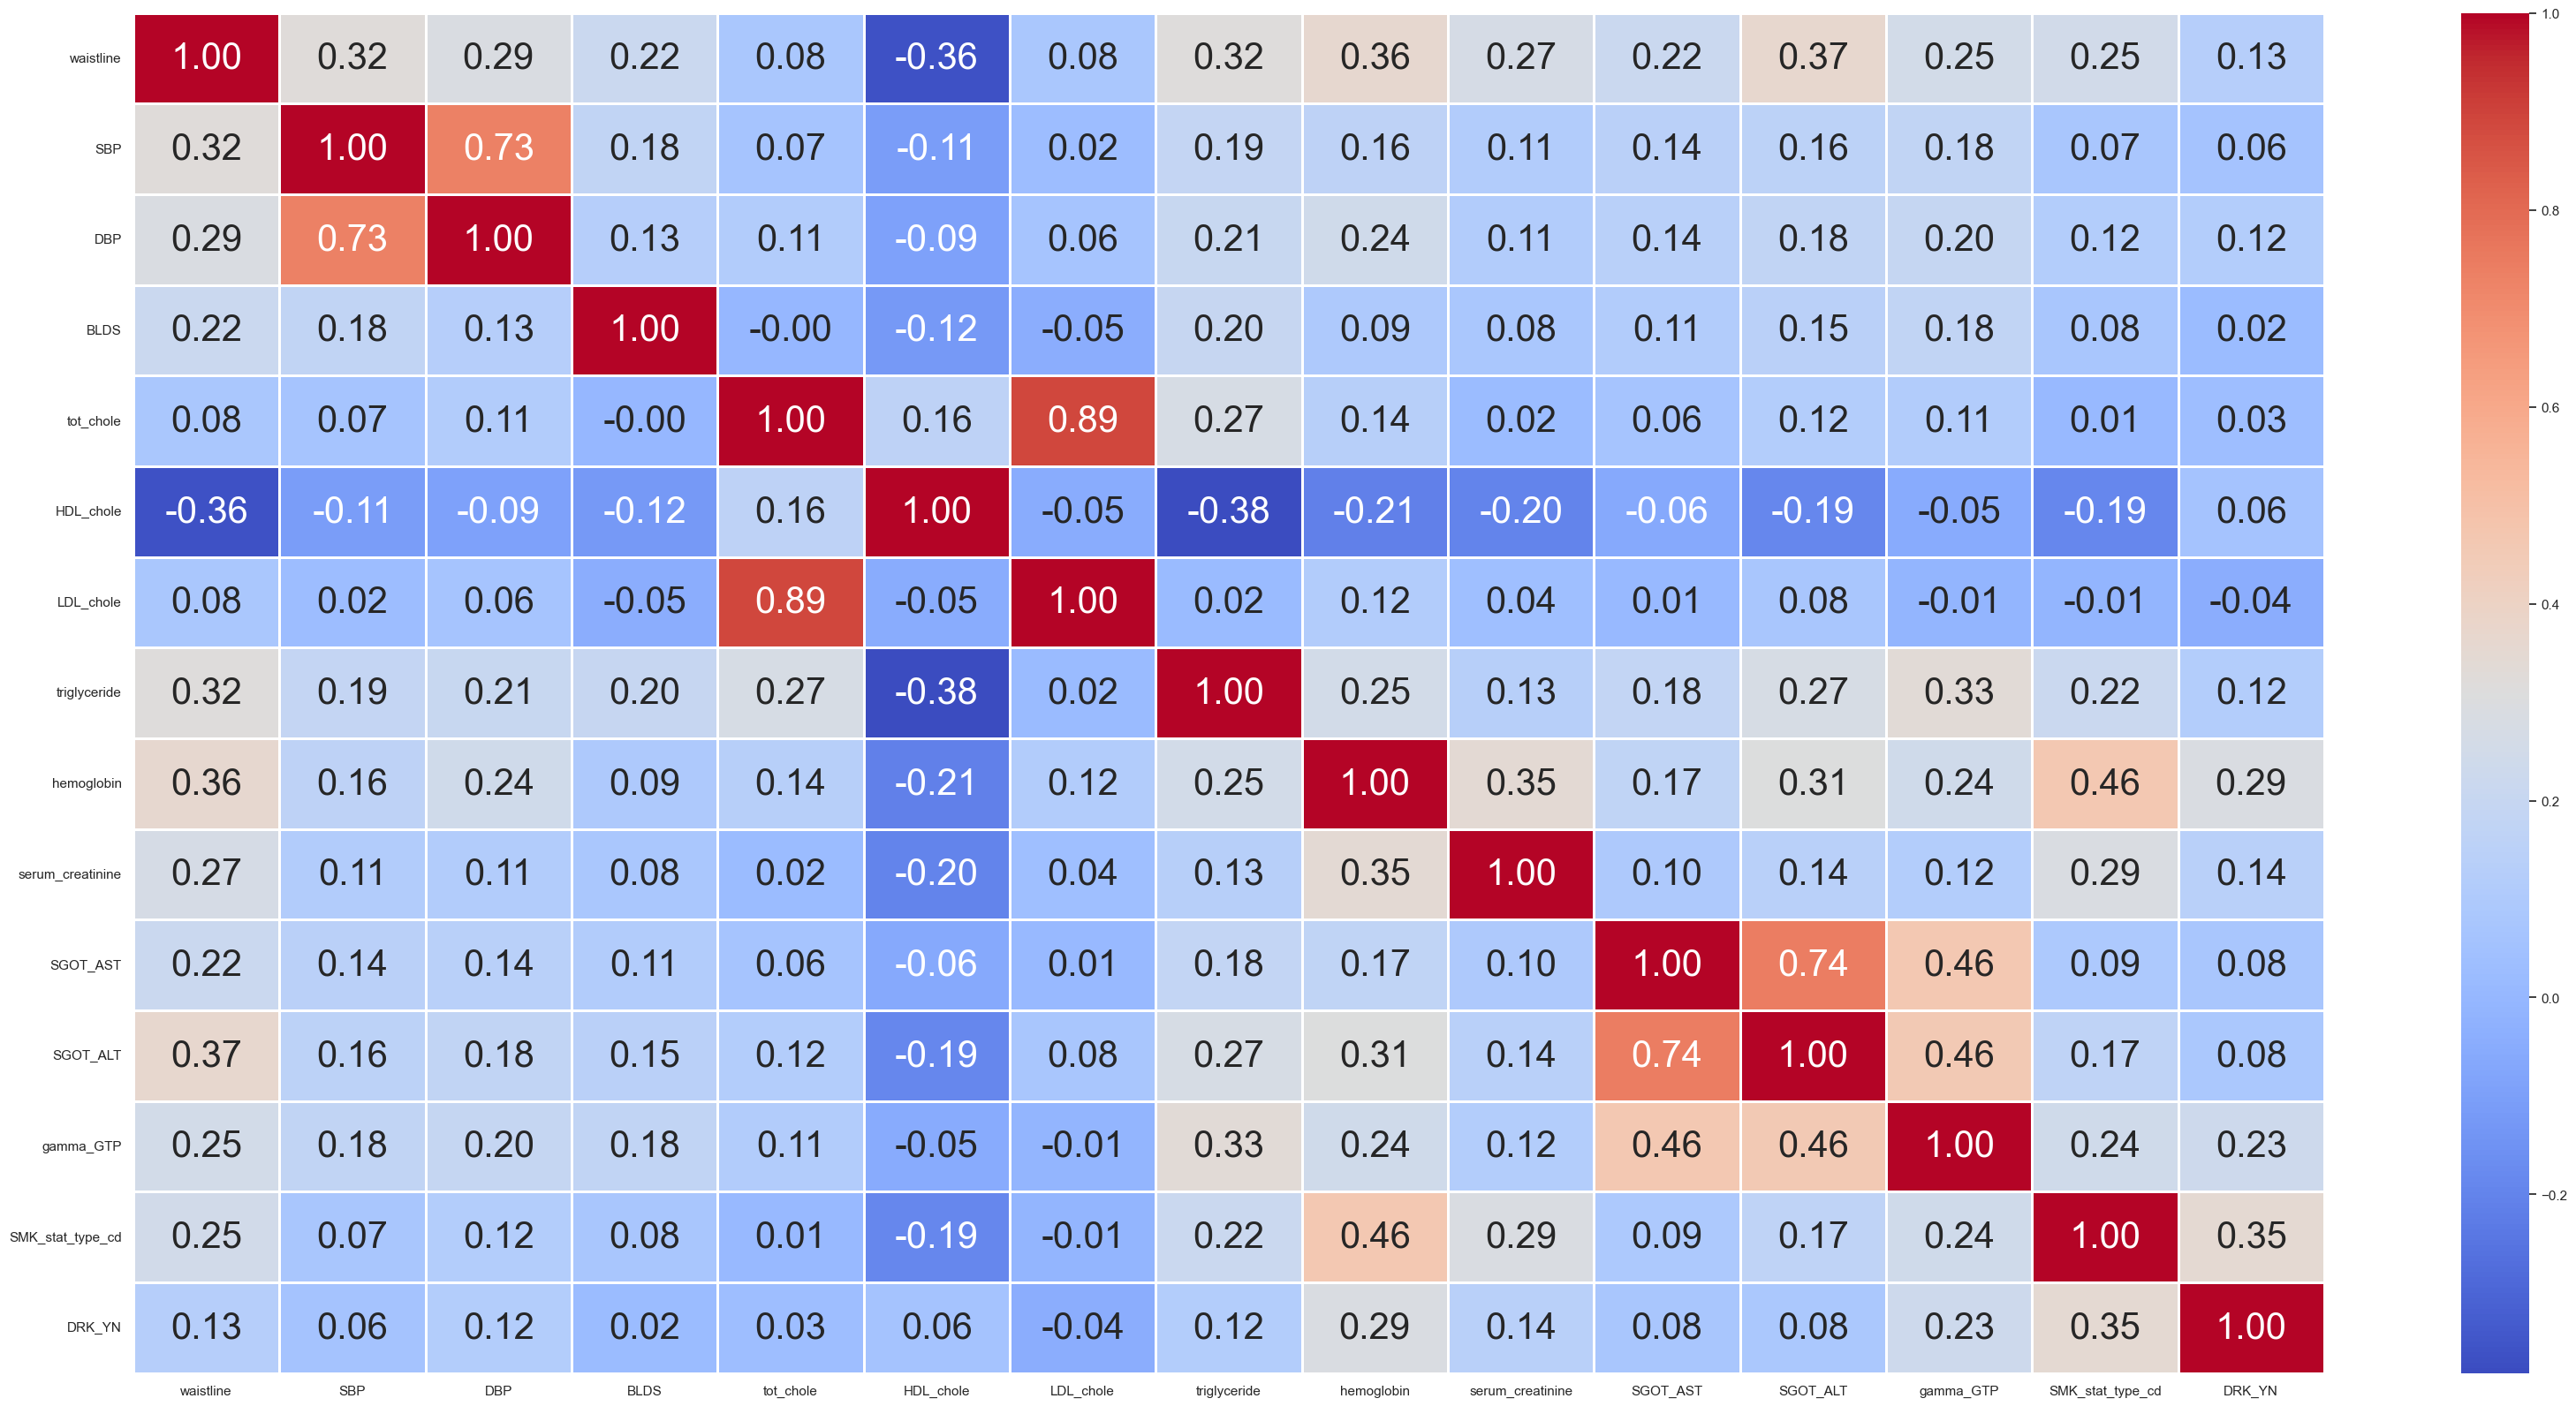

In [148]:
def heatmap():
    # Heatmap
    plt.figure(figsize=(40, 20))
    # heatmap all features
    sns.heatmap(data.loc[:, numerical_features].corr(),
                annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, annot_kws={"fontsize": 30}
                )
    plt.show()


heatmap()

### Pair Plots


In [149]:
data.head()

sex  age  height  weight  waistline  sight_left  sight_right    SBP   DBP  \
0    0   45     155      55       75.0         0.8          0.7  123.0  78.0   
1    0   50     160      50       74.0         0.9          1.0  109.0  70.0   
2    1   75     160      65       86.4         0.8          1.0  138.0  86.0   
3    0   30     155      65       79.0         1.0          0.9  112.0  66.0   
4    0   80     145      50       81.0         0.3          0.3  110.0  64.0   

    BLDS  ...  HDL_chole  LDL_chole  triglyceride  hemoglobin  \
0   91.0  ...       78.0      144.0         120.0        14.5   
1  112.0  ...       65.0      191.0          75.0        14.3   
2   94.0  ...       59.0       78.0          82.0        11.0   
3  110.0  ...       66.0      167.0         130.0        12.6   
4  119.0  ...       66.0       62.0         175.0        13.4   

   serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  
0               0.8      27.0      25.0       32.0               1.0       1  
1               0.7      19.0      16.0       23.0               1.0       0  
2               0.9      22.0      19.0       12.0               1.0       0  
3               0.5      23.0      27.0       22.0               1.0       0  
4               0.8      22.0      21.0       27.0               1.0       0  

[5 rows x 21 columns]

In [150]:
data.columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole',
       'LDL_chole', 'triglyceride', 'hemoglobin', 'serum_creatinine',
       'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')

In [151]:
custom_colors = ['#2B2A4C', '#B31312', '#EEE2DE',
                 '#EA906C', '#DAF7A6', '#1287A5', '#F4D03F', '#00D2D3', '#FF5733',
                 '#900C3F', '#581845', '#FFC300', '#DAF7A6', '#1287A5', '#F4D03F',
                 '#00D2D3', '#FF5733']

In [152]:
def pairplot(data):
    print(data.head())
    sns.pairplot(data=data, hue=current_y_is_smoking_or_drinking, markers=[
                 "o", "s"], palette=custom_colors, diag_kind="kde", height=2.5)
    plt.show()

#### Pair Plots betwween age , height , weight , waistline


        age  height  weight  waistline  SMK_stat_type_cd
155632   45     170      70       80.0               1.0
101105   30     155      50       71.0               1.0
519414   20     180      50       65.0               3.0
114452   65     145      65       86.0               1.0
497067   35     165     100      106.0               3.0


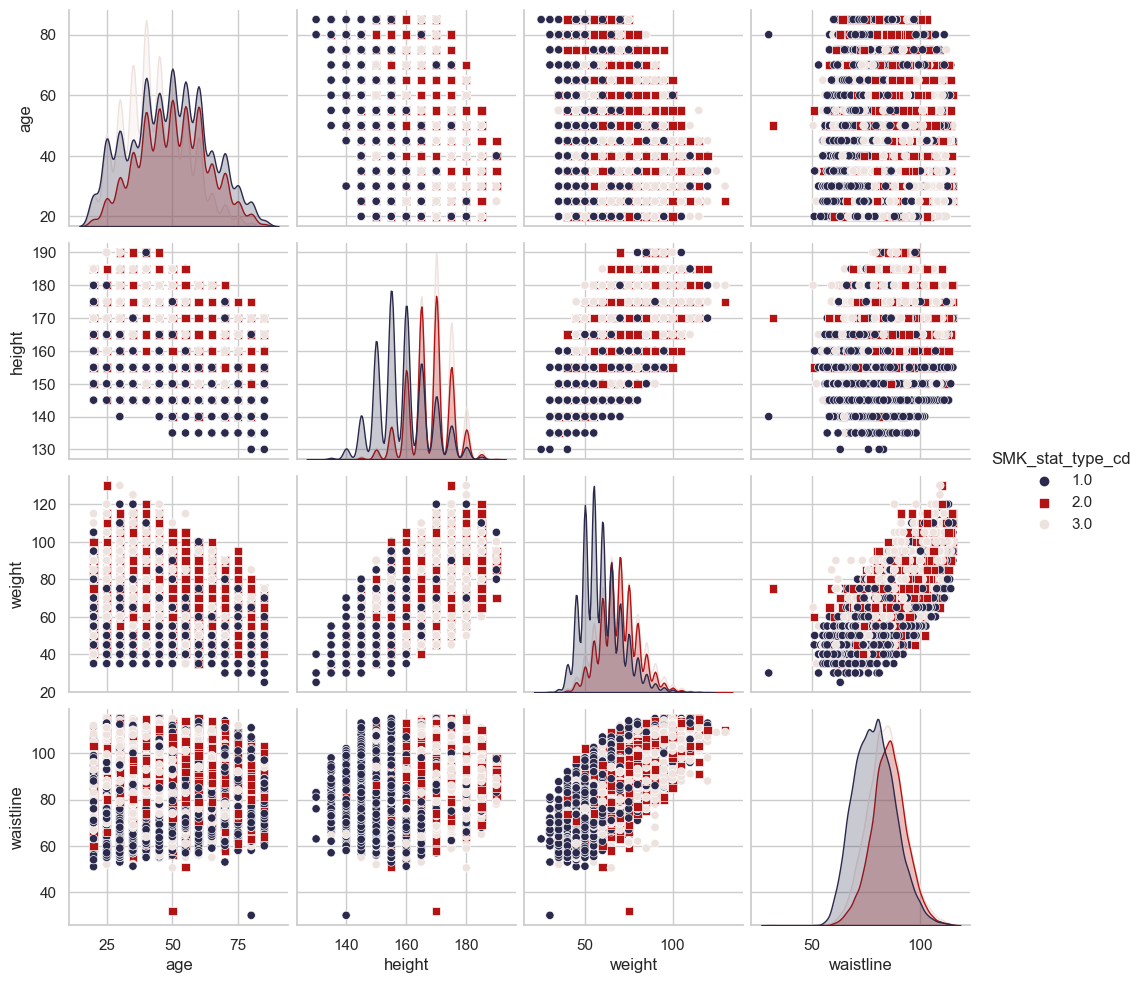

In [153]:
data_changed = {
    'age': data["age"], 'height': data["height"], 'weight': data["weight"], 'waistline': data["waistline"], current_y_is_smoking_or_drinking: data[current_y_is_smoking_or_drinking],
}

data_changed = pd.DataFrame(data_changed)

random_sample_data = data_changed.sample(n=100000, replace=True)

pairplot(random_sample_data)

#### Pair Plots betwween sight_left, sight_right, hear_left, hear_right


        sight_left  sight_right  SMK_stat_type_cd
167406         1.0          0.9               1.0
263401         1.0          1.0               2.0
394449         0.8          1.0               2.0
587143         0.8          1.0               3.0
272483         1.2          0.9               2.0


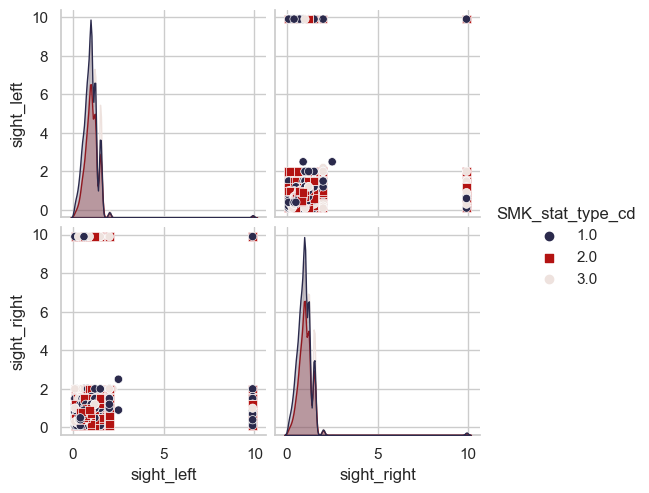

In [154]:
data_changed = {
    'sight_left': data["sight_left"], 'sight_right': data["sight_right"], current_y_is_smoking_or_drinking: data[current_y_is_smoking_or_drinking],
}

data_changed = pd.DataFrame(data_changed)

random_sample_data = data_changed.sample(n=100000, replace=True)

pairplot(random_sample_data)

#### Pair Plots between sbp, sbp and blds


          SBP   DBP   BLDS  SMK_stat_type_cd
61987   106.0  68.0   88.0               1.0
83783   158.0  77.0   87.0               1.0
596328  115.0  84.0   61.0               3.0
550822  130.0  79.0   94.0               3.0
406165  136.0  76.0  110.0               2.0


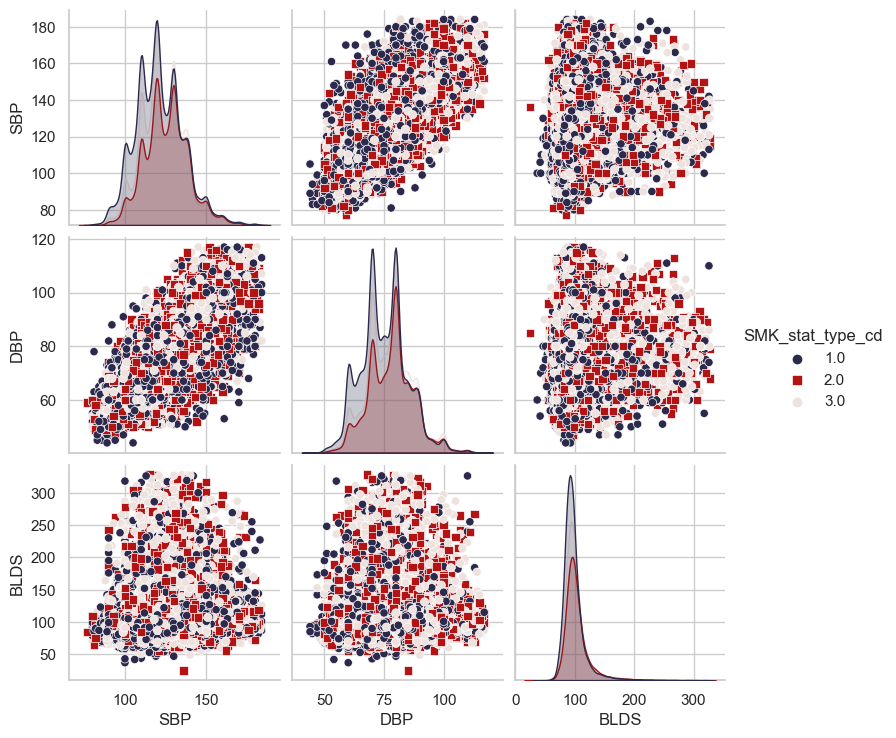

In [155]:
data_changed = {
    'SBP': data["SBP"], 'DBP': data["DBP"], 'BLDS': data["BLDS"], current_y_is_smoking_or_drinking: data[current_y_is_smoking_or_drinking],
}

data_changed = pd.DataFrame(data_changed)

random_sample_data = data_changed.sample(n=100000, replace=True)

pairplot(random_sample_data)

#### Pair Plots between tot_chole, HDL_chole and LDL_chole


        tot_chole  HDL_chole  LDL_chole  SMK_stat_type_cd
405561      150.0       56.0       80.0               2.0
596999      193.0       47.0      125.0               3.0
192672      150.0       48.0       77.0               1.0
531411      170.0       71.0       78.0               3.0
391805      204.0       71.0      118.0               2.0


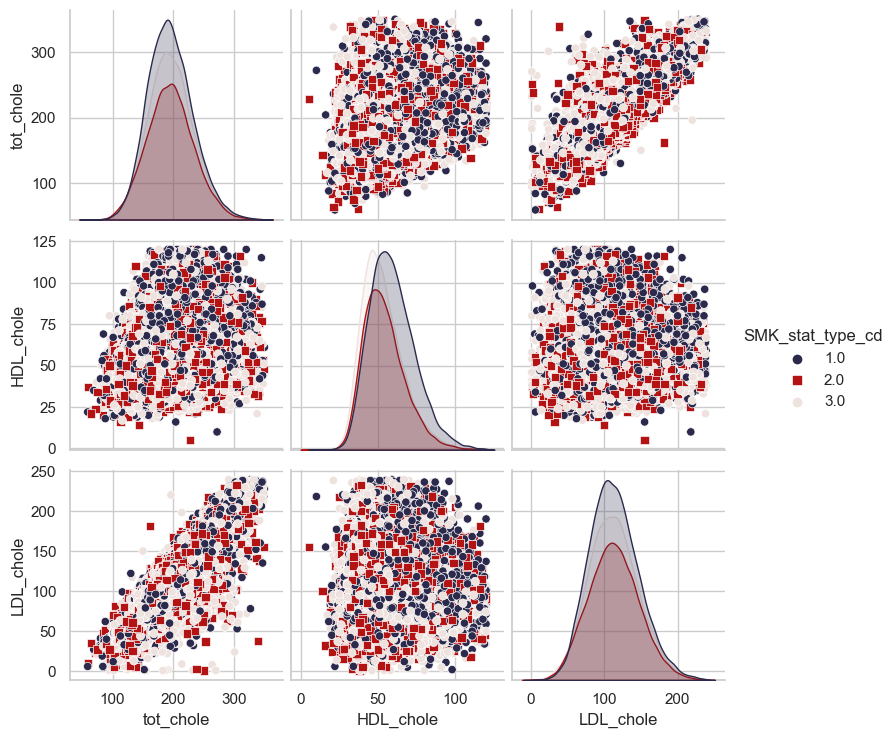

In [156]:
data_changed = {
    'tot_chole': data["tot_chole"], 'HDL_chole': data["HDL_chole"], 'LDL_chole': data["LDL_chole"], current_y_is_smoking_or_drinking: data[current_y_is_smoking_or_drinking],
}

data_changed = pd.DataFrame(data_changed)

random_sample_data = data_changed.sample(n=100000, replace=True)

pairplot(random_sample_data)

#### Pair Plots between triglyceride, hemoglobin, urine_protein and serum_creatinine


        triglyceride  hemoglobin  serum_creatinine  SMK_stat_type_cd
460137         140.0        14.5               1.0               3.0
107692          49.0        15.3               1.0               1.0
257294          52.0        14.6               1.2               2.0
146793          59.0        13.4               0.6               1.0
278493         184.0        14.1               1.0               2.0


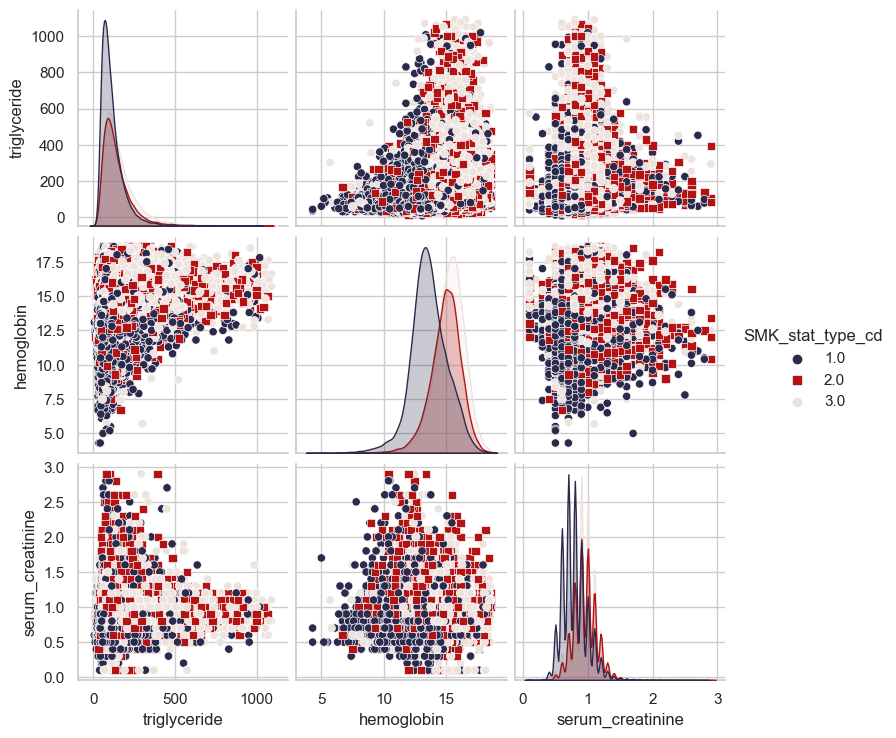

In [157]:
data_changed = {
    'triglyceride': data["triglyceride"], 'hemoglobin': data["hemoglobin"], 'serum_creatinine': data["serum_creatinine"], current_y_is_smoking_or_drinking: data[current_y_is_smoking_or_drinking],
}

data_changed = pd.DataFrame(data_changed)

random_sample_data = data_changed.sample(n=100000, replace=True)

pairplot(random_sample_data)

#### Pair Plots betwween 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP'


        SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd
49379       35.0      49.0       39.0               1.0
328460      38.0      40.0       38.0               2.0
575909      11.0      16.0       40.0               3.0
537859      17.0      13.0       16.0               3.0
239619      46.0      65.0       38.0               1.0


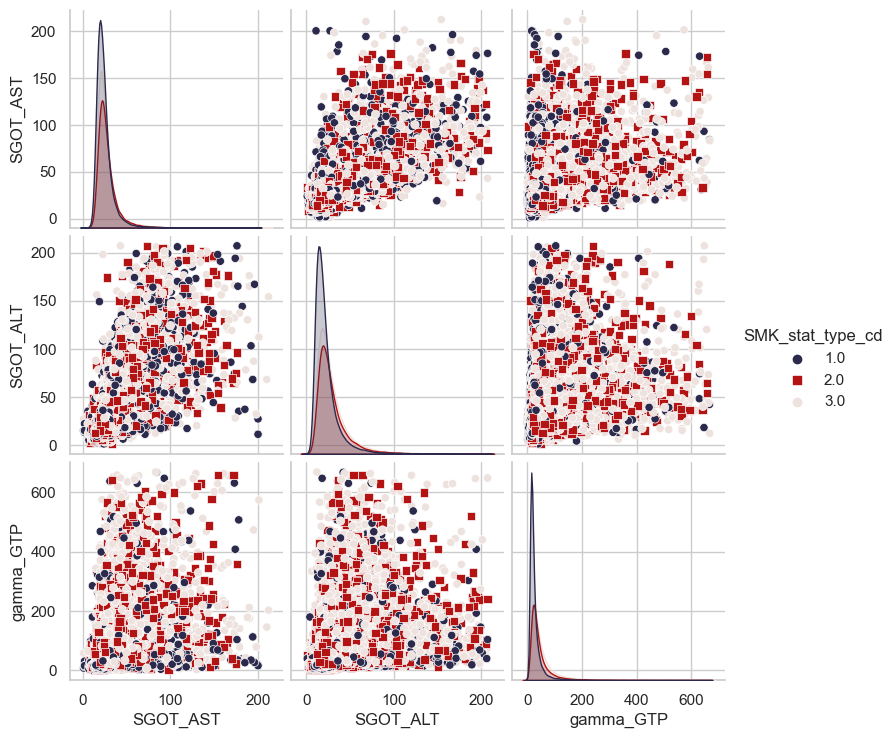

In [158]:
data_changed = {
    'SGOT_AST': data["SGOT_AST"], 'SGOT_ALT': data["SGOT_ALT"], 'gamma_GTP': data["gamma_GTP"], current_y_is_smoking_or_drinking: data[current_y_is_smoking_or_drinking],
}

data_changed = pd.DataFrame(data_changed)

random_sample_data = data_changed.sample(n=100000, replace=True)

pairplot(random_sample_data)

### Dimensionality Reduction


In [159]:
data.columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole',
       'LDL_chole', 'triglyceride', 'hemoglobin', 'serum_creatinine',
       'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')

In [160]:
from sklearn.decomposition import PCA


def workinginpca(data, n_components=1):
    pca = PCA(n_components)

    pca_result = pca.fit_transform(data)

    # Calculate the explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_

    # Display the result
    print(
        f"workinginpca :\n\t\tExplained Variance Ratio: {explained_variance_ratio[0]:.2f}")

    # Check how much data is lost
    data_loss = 1 - explained_variance_ratio[0]
    print(f"\t\tData Lost: {data_loss:.2%}")

In [161]:
from sklearn.decomposition import TruncatedSVD


def workinginsvd(data, n_components=1):
    svd = TruncatedSVD(n_components)

    transformed_data = svd.fit_transform(data)

    # Calculate the explained variance ratio
    explained_variance_ratio = svd.explained_variance_ratio_

    print(
        f"workinginsvd :\n\t\tExplained Variance Ratio: {explained_variance_ratio[0]:.2%}")

    # Check how much data is lost
    data_lost = 1 - explained_variance_ratio[0]
    print(f"\t\tData Lost: {data_lost:.2%}")

In [162]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


def workinginlda(data, target, n_components=1):
    lda = LinearDiscriminantAnalysis(n_components=n_components, solver='eigen')
    X_lda = lda.fit_transform(data, target)

    # Calculate the explained variance ratio
    explained_variance_ratio = lda.explained_variance_ratio_

    # Calculate the proportion of data retained
    data_retained = np.sum(explained_variance_ratio)

    print(
        f"workinginlda :\n\t\tExplained Variance Ratio: {explained_variance_ratio[0]:.2f}")

    # Check how much data is lost
    data_lost = 1 - explained_variance_ratio[0]

    print(f"\t\tProportion of Data Retained: {data_retained:.2%}")
    print(f"\t\tProportion of Data lost: {data_lost:.2%}")

As there are approx. 1M data-points, but just 21~22 features.

- So, dropping columns at the cost of 1~2% data-lost can leave us with very few column.
- So, I decide to drop columns when cost of data-lost is below 0.5%


#### Working in 'height', 'weight', 'waistline'


In [163]:
size = len(data[current_y_is_smoking_or_drinking].value_counts())-1
size

2

In [164]:
workinginpca(data[['height', 'weight', 'waistline']], 2)
workinginsvd(data[['height', 'weight', 'waistline']], 2)
workinginlda(data[['height', 'weight', 'waistline']],
             data[current_y_is_smoking_or_drinking], size)

workinginpca :
		Explained Variance Ratio: 0.79
		Data Lost: 21.22%
workinginsvd :
		Explained Variance Ratio: 55.45%
		Data Lost: 44.55%
workinginlda :
		Explained Variance Ratio: 0.98
		Proportion of Data Retained: 100.00%
		Proportion of Data lost: 1.71%


#### working 'sight_left', 'sight_right'


In [165]:
workinginpca(data[['sight_left', 'sight_right']])
workinginsvd(data[['sight_left', 'sight_right']])
workinginlda(data[['sight_left', 'sight_right']],
             data[current_y_is_smoking_or_drinking])

workinginpca :
		Explained Variance Ratio: 0.65
		Data Lost: 35.29%
workinginsvd :
		Explained Variance Ratio: 64.70%
		Data Lost: 35.30%
workinginlda :
		Explained Variance Ratio: 1.00
		Proportion of Data Retained: 99.99%
		Proportion of Data lost: 0.01%


I decide to replace the above columns with their LDA counter-part


In [166]:
lda = LinearDiscriminantAnalysis(n_components=1)

data['LDA_combined_sight_l_r'] = lda.fit_transform(
    data[['sight_left', 'sight_right']], data[current_y_is_smoking_or_drinking])

data.drop(['sight_left', 'sight_right'], axis=1, inplace=True)
data.head(2)

sex  age  height  weight  waistline    SBP   DBP   BLDS  tot_chole  \
0    0   45     155      55       75.0  123.0  78.0   91.0      246.0   
1    0   50     160      50       74.0  109.0  70.0  112.0      271.0   

   HDL_chole  LDL_chole  triglyceride  hemoglobin  serum_creatinine  SGOT_AST  \
0       78.0      144.0         120.0        14.5               0.8      27.0   
1       65.0      191.0          75.0        14.3               0.7      19.0   

   SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  LDA_combined_sight_l_r  
0      25.0       32.0               1.0       1               -0.511085  
1      16.0       23.0               1.0       0               -0.101059

#### working in SBP AND BLDS


In [167]:
workinginpca(data[['SBP', 'BLDS']])
workinginsvd(data[['SBP', 'BLDS']])
workinginlda(data[['SBP', 'BLDS']], data[current_y_is_smoking_or_drinking])

workinginpca :
		Explained Variance Ratio: 0.75
		Data Lost: 25.47%
workinginsvd :
		Explained Variance Ratio: 53.52%
		Data Lost: 46.48%
workinginlda :
		Explained Variance Ratio: 0.99
		Proportion of Data Retained: 98.95%
		Proportion of Data lost: 1.05%


#### working in tot_chole, LDL_chole


In [168]:
workinginpca(data[['tot_chole', 'LDL_chole']])
workinginsvd(data[['tot_chole', 'LDL_chole']])
workinginlda(data[['tot_chole', 'LDL_chole']],
             data[current_y_is_smoking_or_drinking])

workinginpca :
		Explained Variance Ratio: 0.95
		Data Lost: 5.39%
workinginsvd :
		Explained Variance Ratio: 91.09%
		Data Lost: 8.91%
workinginlda :
		Explained Variance Ratio: 0.99
		Proportion of Data Retained: 99.43%
		Proportion of Data lost: 0.57%


Deciding to choose the lda replacement of ['tot_chole', 'LDL_chole']


In [169]:
lda = LinearDiscriminantAnalysis(n_components=1)

data['LDA_combined_tot_chole_LDL_chole'] = lda.fit_transform(
    data[['tot_chole', 'LDL_chole']], data[current_y_is_smoking_or_drinking])

data.drop(['tot_chole', 'LDL_chole'], axis=1, inplace=True)
data.head(2)

sex  age  height  weight  waistline    SBP   DBP   BLDS  HDL_chole  \
0    0   45     155      55       75.0  123.0  78.0   91.0       78.0   
1    0   50     160      50       74.0  109.0  70.0  112.0       65.0   

   triglyceride  hemoglobin  serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  \
0         120.0        14.5               0.8      27.0      25.0       32.0   
1          75.0        14.3               0.7      19.0      16.0       23.0   

   SMK_stat_type_cd  DRK_YN  LDA_combined_sight_l_r  \
0               1.0       1               -0.511085   
1               1.0       0               -0.101059   

   LDA_combined_tot_chole_LDL_chole  
0                          0.985116  
1                         -0.499173

#### working in SGOT_AST and SGOT_ALT


In [170]:
workinginpca(data[['SGOT_AST', 'SGOT_ALT']])
workinginsvd(data[['SGOT_AST', 'SGOT_ALT']])
workinginlda(data[['SGOT_AST', 'SGOT_ALT']],
             data[current_y_is_smoking_or_drinking])

workinginpca :
		Explained Variance Ratio: 0.89
		Data Lost: 10.71%
workinginsvd :
		Explained Variance Ratio: 86.43%
		Data Lost: 13.57%
workinginlda :
		Explained Variance Ratio: 0.96
		Proportion of Data Retained: 96.01%
		Proportion of Data lost: 3.99%


In [171]:
lda = LinearDiscriminantAnalysis(n_components=1)

data['LDA_combined_SGOT_AST_SGOT_ALT'] = lda.fit_transform(
    data[['SGOT_AST', 'SGOT_ALT']], data[current_y_is_smoking_or_drinking])

data.drop(['SGOT_AST', 'SGOT_ALT'], axis=1, inplace=True)
data.head(2)

sex  age  height  weight  waistline    SBP   DBP   BLDS  HDL_chole  \
0    0   45     155      55       75.0  123.0  78.0   91.0       78.0   
1    0   50     160      50       74.0  109.0  70.0  112.0       65.0   

   triglyceride  hemoglobin  serum_creatinine  gamma_GTP  SMK_stat_type_cd  \
0         120.0        14.5               0.8       32.0               1.0   
1          75.0        14.3               0.7       23.0               1.0   

   DRK_YN  LDA_combined_sight_l_r  LDA_combined_tot_chole_LDL_chole  \
0       1               -0.511085                          0.985116   
1       0               -0.101059                         -0.499173   

   LDA_combined_SGOT_AST_SGOT_ALT  
0                       -0.130502  
1                       -0.523476

### Splitting and Scaling Data


In [172]:
new_data = data.copy().sample(n=100000)
X = new_data.drop(['SMK_stat_type_cd', 'DRK_YN'], axis=1)
y = new_data[current_y_is_smoking_or_drinking]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression Model


- There are 3 types of patients in the target class (non – smokers : 1, stopped smoking: 2, smoker : 3). However, Logistic Regression is generally used for binary classification. But, in the scikit learn library, the model has been extended to include multi – class classification.
- The model has been used in its default mode (‘auto’ for multi – class). Here is an exerpt from the documentation: “‘auto’ selects ‘ovr’ if the data is binary, or if solver=’liblinear’, and otherwise selects ‘multinomial’.”


In [173]:
logreg_model = LogisticRegression(random_state=42)

logreg_model.fit(X_train, y_train)

logreg_predictions = logreg_model.predict(X_test)
logreg_pred_train = logreg_model.predict(X_train)


print("Logistic Regression:")

print("Accuracy:", accuracy_score(y_test, logreg_predictions))

print("Classification Report:\n",
      classification_report(y_test, logreg_predictions))
print("confusion_matrix:\n", confusion_matrix(y_test, logreg_predictions))

Logistic Regression:
Accuracy: 0.6532
Classification Report:
               precision    recall  f1-score   support

         1.0       0.87      0.73      0.79      7878
         2.0       0.52      0.51      0.52      5471
         3.0       0.56      0.68      0.62      6651

    accuracy                           0.65     20000
   macro avg       0.65      0.64      0.64     20000
weighted avg       0.67      0.65      0.66     20000

confusion_matrix:
 [[5722  932 1224]
 [ 327 2800 2344]
 [ 491 1618 4542]]


### GaussianNB Model

- Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. More can be found here.

In [174]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)

print("\nNaive Bayes:")
print("Accuracy:", accuracy_score(y_test, nb_predictions))
print("Classification Report:\n", classification_report(y_test, nb_predictions))
print("confusion_matrix:\n", confusion_matrix(y_test, nb_predictions))


Naive Bayes:
Accuracy: 0.62
Classification Report:
               precision    recall  f1-score   support

         1.0       0.77      0.75      0.76      7878
         2.0       0.49      0.54      0.51      5471
         3.0       0.56      0.53      0.55      6651

    accuracy                           0.62     20000
   macro avg       0.61      0.61      0.61     20000
weighted avg       0.62      0.62      0.62     20000

confusion_matrix:
 [[5926  959  993]
 [ 776 2955 1740]
 [1006 2126 3519]]


1. Simple

- Logistic Regression:
  Accuracy: 0.6520003150102378
- Naive Bayes:
  Accuracy: 0.6153488738383998
- ANN
  Test Accuracy: 0.3923531174659729

2. LDA

- Logistic Regression:
  Accuracy: 0.6515301712173961
- Naive Bayes:
  Accuracy: 0.62956295550251
- ANN: Test Accuracy: 0.3922218680381775


### Artificial Neural Network models


- The input size passed to the ANN was of size 16 and a fully feed – forward network with 10 dense layers with the activation function as RELU was created. The loss function used was Categorical Cross Entropy.


In [175]:
X.shape

(100000, 16)

In [176]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(np.array([y_train]).reshape(-1, 1))
print(enc.categories_)
y_train = enc.transform(np.array([y_train]).reshape(-1, 1)).toarray()
y_test = enc.transform(np.array([y_test]).reshape(-1, 1)).toarray()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

[array([1., 2., 3.])]


((80000, 16), (80000, 3), (20000, 16), (20000, 3))

In [183]:
activation1 = 'relu'
activation2 = 'sigmoid'

model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation=activation1,
                          input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(32, activation=activation1),
    tf.keras.layers.Dense(64, activation=activation1),
    tf.keras.layers.Dense(128, activation=activation1),
    tf.keras.layers.Dense(256, activation=activation1),
    tf.keras.layers.Dense(128, activation=activation1),
    tf.keras.layers.Dense(64, activation=activation1),
    tf.keras.layers.Dense(32, activation=activation1),
    tf.keras.layers.Dense(16, activation=activation1),
    tf.keras.layers.Dense(size+1, activation=activation2),
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.006)
cce = tf.keras.losses.CategoricalCrossentropy(
    from_logits=True,
    reduction="auto",
    name="categorical_crossentropy",
)

model.compile(optimizer=optimizer,
              loss=cce, metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=30, batch_size=128,
                    validation_data=(X_test, y_test))

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/30
625/625 [==============================] - 12s 6ms/step - loss: 0.8091 - accuracy: 0.6406 - val_loss: 0.8019 - val_accuracy: 0.6443
Epoch 2/30
625/625 [==============================] - 3s 4ms/step - loss: 0.7853 - accuracy: 0.6563 - val_loss: 0.7877 - val_accuracy: 0.6590
Epoch 3/30
625/625 [==============================] - 2s 4ms/step - loss: 0.7827 - accuracy: 0.6568 - val_loss: 0.7891 - val_accuracy: 0.6539
Epoch 4/30
625/625 [==============================] - 3s 4ms/step - loss: 0.7804 - accuracy: 0.6584 - val_loss: 0.7845 - val_accuracy: 0.6603
Epoch 5/30
625/625 [==============================] - 3s 4ms/step - loss: 0.7791 - accuracy: 0.6583 - val_loss: 0.7782 - val_accuracy: 0.6585
Epoch 6/30
625/625 [==============================] - 2s 4ms/step - loss: 0.7763 - accuracy: 0.6580 - val_loss: 0.7786 - val_accuracy: 0.6580
Epoch 7/30
625/625 [==============================] - 3s 5ms/step - loss: 0.7778 - accuracy: 0.6593 - val_loss: 0.7778 - val_accuracy: 0.6568
Epoch

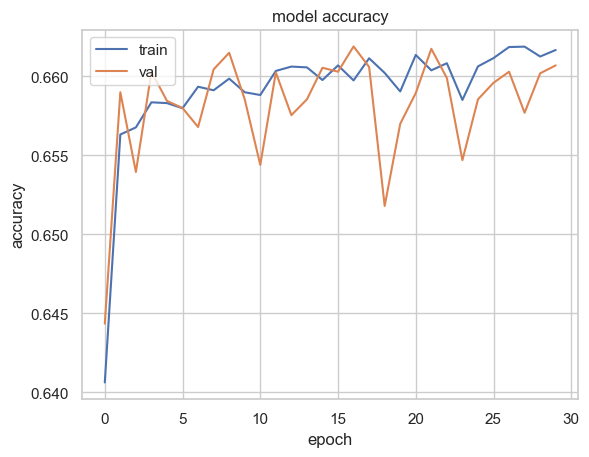

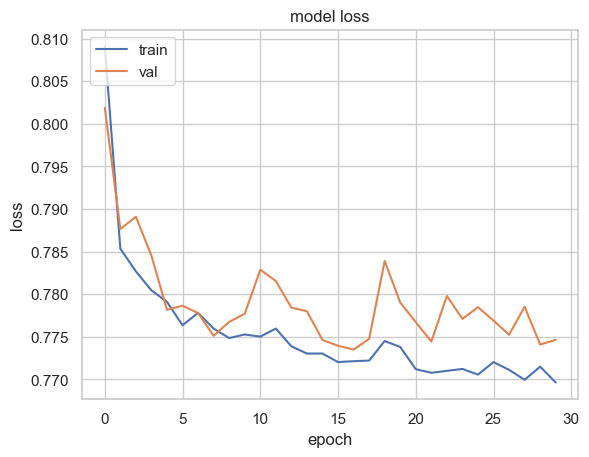

In [184]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.show()

In [185]:
y_predicted_labels = model.predict(X_test)
print(y_predicted_labels[0:2])

predicted_labels = (y_predicted_labels)

print(predicted_labels[0:8])

625/625 [==============================] - 1s 2ms/step
[[0.8250038  0.16130437 0.18469875]
 [0.76030576 0.18672171 0.24824224]]
[[0.8250038  0.16130437 0.18469875]
 [0.76030576 0.18672171 0.24824224]
 [0.3796839  0.6854702  0.56344163]
 [0.41821474 0.45922524 0.6460221 ]
 [0.89635    0.12580799 0.11606393]
 [0.8044241  0.16988513 0.20473255]
 [0.48404193 0.6755714  0.4098087 ]
 [0.84237343 0.15336096 0.1683257 ]]


In [186]:
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(predicted_labels, axis=1)

In [187]:
cm = tf.math.confusion_matrix(labels=y_true, predictions=y_pred)
print(cm)

tf.Tensor(
[[5714  889 1275]
 [ 329 2633 2509]
 [ 488 1296 4867]], shape=(3, 3), dtype=int32)


In [188]:
print("ANN")
print(f"Accuracy: {test_accuracy}")
print("\n")
print(classification_report(y_true, y_pred))
print("\n")
print("Confusion matrix", cm)

ANN
Accuracy: 0.6607000231742859


              precision    recall  f1-score   support

           0       0.87      0.73      0.79      7878
           1       0.55      0.48      0.51      5471
           2       0.56      0.73      0.64      6651

    accuracy                           0.66     20000
   macro avg       0.66      0.65      0.65     20000
weighted avg       0.68      0.66      0.66     20000



Confusion matrix tf.Tensor(
[[5714  889 1275]
 [ 329 2633 2509]
 [ 488 1296 4867]], shape=(3, 3), dtype=int32)
